In [1]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import random
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.optim as optim
%matplotlib inline

In [2]:
# use GPU if available otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
transform = transforms.Compose([transforms.ToTensor()])

# CNN with PyTorch

In [4]:
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR10(root='./data', train = False, download=False, transform=transform)

Files already downloaded and verified


In [5]:
# hyper paramters
learning_rate = 0.001
batch_size = 4
epochs = 10 ### ClEAR4SOL ###
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [6]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size= batch_size, shuffle=False, num_workers=2)

In [7]:
print(type(train_loader))

<class 'torch.utils.data.dataloader.DataLoader'>


horse   dog   dog plane


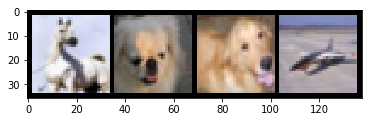

In [8]:
# print example images
def imgshow(img):
    img = img
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
dataiter = iter(train_loader)
images, labels = dataiter.next()
a,b,c = torchvision.utils.make_grid(images)
imgshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

        self.pool = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()

        self.fc1 = nn.Linear(in_features=16 * 16 * 64, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)

        x = self.conv2(x)
        x = self.relu2(x)

        x = self.pool(x)

        x = self.conv3(x)
        x = self.relu3(x)

        x = self.conv4(x)
        x = self.relu4(x)
#         print(x.shape)
        x = x.view(-1, 64*16*16)
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        
        return F.log_softmax(x, dim=1)


In [10]:
net = Net()
net = net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)


C:\ProgramData\Anaconda3\lib\site-packages\torch\cuda\__init__.py:117: UserWarning: 
    Found GPU0 GeForce GT 750M which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


We also need a test function, to evaluate the accuracy of the test set.

In [11]:
def test_function():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total


Finally train the CNN.

In [ ]:
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
#         print("outputs size: ", outputs.size())
#         print("labels size: ", labels.size())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

In [13]:
print("Accuracy on test set:", test_function())

Accuracy on test set: 71.03


# CNN for MNIST

In [4]:
#define parameters of NN
num_epochs = 10
batch_size = 16
learning_rate = [0.01, 0.1, 0.25, 0.5]

In [5]:
train_dataset = dsets.MNIST(root = './data',train = True,transform = transforms.ToTensor(),download = True)
test_dataset = dsets.MNIST(root = './data',train = False ,transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,batch_size =batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = False)

In [6]:
class conv_net(nn.Module):
    def __init__(self):
        super(conv_net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [7]:
criterion = nn.CrossEntropyLoss()


In [8]:
def test_function(c_net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = c_net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return 100 * correct / total


In the end we train the CNN for the MNIST dataset. Improve the result of the accuracy compared to the results of last exercise.

In [14]:
def train(l_rate):
    convnet = conv_net()
    convnet = convnet.to(device)
    optimizer = optim.SGD(convnet.parameters(), lr=l_rate, momentum=0.9)
    for epoch in range(num_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = convnet(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        running_loss += loss.item()        
        print('[epoch: %d] loss: %.3f' %(epoch + 1, running_loss))
        running_loss = 0.0
    return convnet
    print('Finished Training with lr: %.3f' %l_rate)

In [15]:
accuracy_list = np.zeros(len(learning_rate))

In [ ]:
for i in range(len(learning_rate)):
    lr = learning_rate[i]
    c_net = train(lr)
    acc = test_function(c_net)
    accuracy_list[i]=acc
    print('Learning rate: %.3f , Accuracy: %d'%(lr, acc))

In [50]:
print("Accuracy: ", test_function())

Accuracy:  94.1
